# Ehab - Fawzy

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression      
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataFeatures = pd.read_excel('gain1010.xlsx', skiprows=1)
dataTarget = pd.read_excel('ygain1010.xlsx')
dataFeatures.head()

,T01,H01,T02,H02,T11,H11,T12,H12,T21,H21,T22,H22
0,30.21,43.82,30.16,43.05,30.20,43.79,30.17,43.05,30.19,43.79,30.17,43.05
1,30.20,43.79,30.17,43.05,30.19,43.79,30.17,43.05,30.19,43.79,30.19,43.12
2,30.19,43.79,30.17,43.05,30.19,43.79,30.19,43.12,30.19,43.79,30.18,43.09
3,30.19,43.79,30.19,43.12,30.19,43.79,30.18,43.09,30.19,43.79,30.18,43.09
4,30.19,43.79,30.18,43.09,30.19,43.79,30.18,43.09,30.19,43.79,30.18,43.09


In [3]:
dataTarget.head()

,1
0,1
1,1
2,1
3,1
4,1


In [4]:
dataTarget.replace({-1:0}, inplace=True)

In [5]:
dataTarget.value_counts()

1
1    4215
0     472
Name: count, dtype: int64

In [6]:
dataFeatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4688 entries, 0 to 4687
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T01     4688 non-null   float64
 1   H01     4688 non-null   float64
 2   T02     4688 non-null   float64
 3   H02     4688 non-null   float64
 4   T11     4688 non-null   float64
 5   H11     4688 non-null   float64
 6   T12     4688 non-null   float64
 7   H12     4688 non-null   float64
 8   T21     4688 non-null   float64
 9   H21     4688 non-null   float64
 10  T22     4688 non-null   float64
 11  H22     4688 non-null   float64
dtypes: float64(12)
memory usage: 439.6 KB


In [7]:
dataFeatures.duplicated().sum()

np.int64(0)

In [8]:
dataFeatures.shape

(4688, 12)

In [9]:
dataTarget.shape

(4687, 1)

In [10]:
dataFeatures.drop(index=dataFeatures.index[-1], axis=0, inplace=True)

In [11]:
dataFeatures.shape

(4687, 12)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(dataFeatures, dataTarget, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [14]:
model = LogisticRegression()
model.fit(x_train, y_train)

/home/ehab/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [15]:
y_pred = model.predict(x_test)

In [16]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")

Accuracy: 99.89%


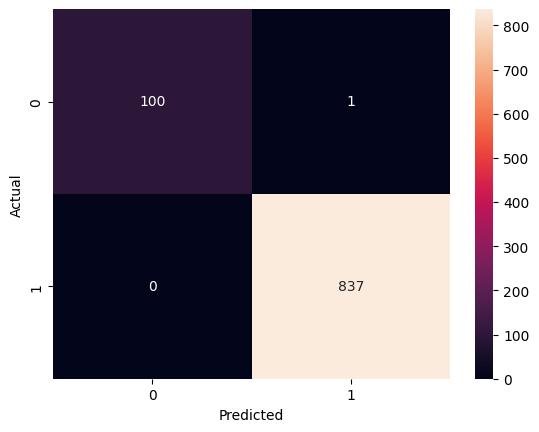

In [18]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()